# 1) Import Data

  Import Pandas
  Ingest FluNetInteractiveReport file
  Extract extra rows from title

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
fludata = pd.read_csv('./FluNet0919.csv', skiprows = 3, sep=',')
fludata.tail(10)


,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
502,India,South-East Asia Region of WHO,Southern Asia,2018,51,2018-12-17,2018-12-23,578.0,564,NaN,...,NaN,NaN,86,1.0,1.0,NaN,2,88,476.0,Local Outbreak
503,India,South-East Asia Region of WHO,Southern Asia,2018,52,2018-12-24,2018-12-30,539.0,522,NaN,...,NaN,NaN,89,NaN,NaN,2.0,2,91,431.0,Local Outbreak
504,India,South-East Asia Region of WHO,Southern Asia,2019,1,2018-12-31,2019-01-06,1098.0,1069,NaN,...,NaN,NaN,264,5.0,NaN,NaN,5,269,800.0,Local Outbreak
505,India,South-East Asia Region of WHO,Southern Asia,2019,2,2019-01-07,2019-01-13,1876.0,1855,NaN,...,NaN,NaN,498,3.0,1.0,NaN,4,502,1353.0,Local Outbreak
506,India,South-East Asia Region of WHO,Southern Asia,2019,3,2019-01-14,2019-01-20,1916.0,1866,NaN,...,NaN,NaN,494,2.0,NaN,1.0,3,497,1369.0,Local Outbreak
507,India,South-East Asia Region of WHO,Southern Asia,2019,4,2019-01-21,2019-01-27,2041.0,2041,NaN,...,NaN,NaN,601,4.0,NaN,NaN,4,605,1436.0,Regional Outbreak
508,India,South-East Asia Region of WHO,Southern Asia,2019,5,2019-01-28,2019-02-03,2754.0,2723,NaN,...,NaN,NaN,670,2.0,NaN,NaN,2,672,2051.0,Regional Outbreak
509,India,South-East Asia Region of WHO,Southern Asia,2019,6,2019-02-04,2019-02-10,2927.0,2915,NaN,...,NaN,NaN,739,6.0,NaN,2.0,8,747,2168.0,Regional Outbreak
510,India,South-East Asia Region of WHO,Southern Asia,2019,7,2019-02-11,2019-02-17,3073.0,3068,NaN,...,NaN,NaN,868,2.0,NaN,1.0,3,871,2197.0,Regional Outbreak
511,India,South-East Asia Region of WHO,Southern Asia,2019,8,2019-02-18,2019-02-24,2849.0,2800,NaN,...,NaN,NaN,606,3.0,1.0,1.0,5,611,2189.0,Regional Outbreak


# 2) Explore



In [806]:
fludata.describe()

,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2
count,555.000000,555.000000,497.000000,555.000000,425.000000,484.000000,488.000000,387.0,387.0,555.000000,442.000000,411.000000,526.000000,555.00000,555.000000,114.000000
mean,2013.192793,26.095495,325.191147,293.454054,0.484706,46.909091,10.313525,0.0,0.0,50.347748,0.436652,0.221411,5.927757,6.12973,56.477477,283.763158
std,3.146935,15.128209,408.964602,384.770093,3.210445,111.390868,24.921933,0.0,0.0,117.617472,1.388915,0.943336,10.613132,10.79215,118.071954,327.044862
min,2008.000000,1.000000,14.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,21.000000
25%,2011.000000,13.000000,132.000000,102.500000,0.000000,1.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.000000,0.00000,4.000000,125.250000
50%,2013.000000,26.000000,212.000000,187.000000,0.000000,8.000000,2.000000,0.0,0.0,13.000000,0.000000,0.000000,2.000000,2.00000,23.000000,214.500000
75%,2016.000000,39.000000,362.000000,333.000000,0.000000,43.500000,9.000000,0.0,0.0,49.000000,0.000000,0.000000,7.000000,7.50000,58.000000,312.000000
max,2019.000000,53.000000,3051.000000,3051.000000,41.000000,1033.000000,236.000000,0.0,0.0,1038.000000,12.000000,13.000000,83.000000,88.00000,1040.000000,2052.000000


In [807]:
fludata.corr()

,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2
Year,1.000000,-0.002890,-0.124908,0.011865,-0.192714,-0.066463,0.111682,NaN,NaN,0.019847,0.296795,-0.014985,-0.071455,-0.045808,0.015584,0.490627
Week,-0.002890,1.000000,-0.090238,-0.064936,0.083234,-0.094236,-0.088378,NaN,NaN,-0.077385,-0.165468,-0.137910,0.020251,-0.001171,-0.077194,-0.267691
SPEC_RECEIVED_NB,-0.124908,-0.090238,1.000000,0.998408,0.441451,0.939297,0.558253,NaN,NaN,0.963556,0.148499,0.017352,0.100571,0.085590,0.969789,0.998252
SPEC_PROCESSED_NB,0.011865,-0.064936,0.998408,1.000000,0.398271,0.941072,0.553181,NaN,NaN,0.961679,0.124293,0.001333,0.135686,0.122205,0.969147,0.998232
AH1,-0.192714,0.083234,0.441451,0.398271,1.000000,0.331640,0.610146,NaN,NaN,0.428008,-0.028541,-0.030490,-0.086168,-0.084231,0.418033,NaN
AH1N12009,-0.066463,-0.094236,0.939297,0.941072,0.331640,1.000000,0.382030,NaN,NaN,0.981062,0.069573,-0.012905,-0.007904,-0.014931,0.978662,0.971600
AH3,0.111682,-0.088378,0.558253,0.553181,0.610146,0.382030,1.000000,NaN,NaN,0.557111,0.182861,-0.037602,-0.106420,-0.087951,0.548018,0.934229
AH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANOTSUBTYPED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INF_A,0.019847,-0.077385,0.963556,0.961679,0.428008,0.981062,0.557111,NaN,NaN,1.000000,0.080369,-0.034250,-0.000407,-0.003685,0.995814,0.975774


In [808]:
fludata.dtypes

Country               object
WHOREGION             object
FLUREGION             object
Year                   int64
Week                   int64
SDATE                 object
EDATE                 object
SPEC_RECEIVED_NB     float64
SPEC_PROCESSED_NB      int64
AH1                  float64
AH1N12009            float64
AH3                  float64
AH5                  float64
ANOTSUBTYPED         float64
INF_A                  int64
BYAMAGATA            float64
BVICTORIA            float64
BNOTDETERMINED       float64
INF_B                  int64
ALL_INF                int64
ALL_INF2             float64
TITLE                 object
dtype: object

# 3) Clean & Merge

*  Find NaN and replace them with 0 as no data means no cases reported.
*  Remove top rows as they were sub headings in the table imported.
*  Remove region columns as this is only region data.


In [809]:
fludata.isnull().any()

Country              False
WHOREGION            False
FLUREGION            False
Year                 False
Week                 False
SDATE                False
EDATE                False
SPEC_RECEIVED_NB      True
SPEC_PROCESSED_NB    False
AH1                   True
AH1N12009             True
AH3                   True
AH5                   True
ANOTSUBTYPED          True
INF_A                False
BYAMAGATA             True
BVICTORIA             True
BNOTDETERMINED        True
INF_B                False
ALL_INF              False
ALL_INF2              True
TITLE                False
dtype: bool

In [810]:
#fludata1 = fludata.dropna(axis='columns', how='all')
fludata = fludata.fillna(0)
fludata.tail()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
550,India,South-East Asia Region of WHO,Southern Asia,2019,2,2019-01-07,2019-01-13,1876.0,1855,0.0,...,0.0,0.0,498,3.0,1.0,0.0,4,502,1353.0,Local Outbreak
551,India,South-East Asia Region of WHO,Southern Asia,2019,3,2019-01-14,2019-01-20,1916.0,1866,0.0,...,0.0,0.0,494,2.0,0.0,1.0,3,497,1369.0,Local Outbreak
552,India,South-East Asia Region of WHO,Southern Asia,2019,4,2019-01-21,2019-01-27,2041.0,2041,0.0,...,0.0,0.0,601,4.0,0.0,0.0,4,605,1436.0,Regional Outbreak
553,India,South-East Asia Region of WHO,Southern Asia,2019,5,2019-01-28,2019-02-03,2754.0,2723,0.0,...,0.0,0.0,670,2.0,0.0,0.0,2,672,2051.0,Regional Outbreak
554,India,South-East Asia Region of WHO,Southern Asia,2019,6,2019-02-04,2019-02-10,2822.0,2732,0.0,...,0.0,0.0,672,6.0,0.0,2.0,8,680,2052.0,Regional Outbreak


In [811]:
fludata.isnull().any()

Country              False
WHOREGION            False
FLUREGION            False
Year                 False
Week                 False
SDATE                False
EDATE                False
SPEC_RECEIVED_NB     False
SPEC_PROCESSED_NB    False
AH1                  False
AH1N12009            False
AH3                  False
AH5                  False
ANOTSUBTYPED         False
INF_A                False
BYAMAGATA            False
BVICTORIA            False
BNOTDETERMINED       False
INF_B                False
ALL_INF              False
ALL_INF2             False
TITLE                False
dtype: bool

In [812]:
fludata1 = fludata
fludata1 = fludata1.drop(columns =['WHOREGION', 'FLUREGION', 'SDATE', 'EDATE', 'TITLE', 'Country'])

fludata1.tail()

,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2
550,2019,2,1876.0,1855,0.0,316.0,182.0,0.0,0.0,498,3.0,1.0,0.0,4,502,1353.0
551,2019,3,1916.0,1866,0.0,307.0,187.0,0.0,0.0,494,2.0,0.0,1.0,3,497,1369.0
552,2019,4,2041.0,2041,0.0,365.0,236.0,0.0,0.0,601,4.0,0.0,0.0,4,605,1436.0
553,2019,5,2754.0,2723,0.0,485.0,185.0,0.0,0.0,670,2.0,0.0,0.0,2,672,2051.0
554,2019,6,2822.0,2732,0.0,478.0,194.0,0.0,0.0,672,6.0,0.0,2.0,8,680,2052.0


In [813]:
print(fludata1.groupby("Year").max())

      Week  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB   AH1  AH1N12009    AH3  AH5  \
Year                                                                           
2008    45               0.0                161   1.0        0.0    4.0  0.0   
2009    52            2904.0               2540  41.0      713.0  151.0  0.0   
2010    50            1497.0               1497   2.0      491.0   25.0  0.0   
2011    52             352.0                350   0.0       63.0   75.0  0.0   
2012    52             629.0                629   0.0      100.0   18.0  0.0   
2013    52             400.0                400   0.0       42.0   69.0  0.0   
2014    52             230.0                230   0.0        5.0   50.0  0.0   
2015    53            3051.0               3051   0.0     1033.0   27.0  0.0   
2016    52             104.0                104   0.0        5.0    8.0  0.0   
2017    52             524.0                524   0.0      105.0   21.0  0.0   
2018    52             630.0            

# 4) Visualize 

*  See distribution of the type A, type B and H1N1 data.
*  Plot total Flu cases by year.
*  Plot mean Flu cases by week.

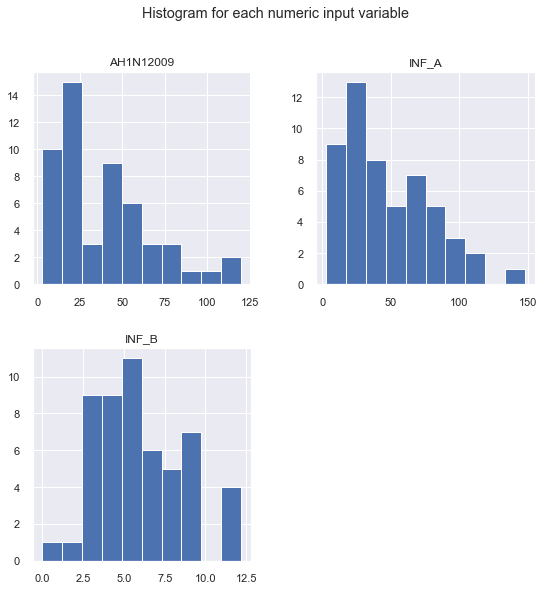

In [814]:
import pylab as pl
fludata3 = fludata[['Year','Week','AH1N12009','INF_A', 'INF_B']].groupby('Week', as_index=True).mean()

fludata3.drop('Year' ,axis=1).hist(bins=10, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fludata_hist')
plt.show()

C:\Users\BG\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


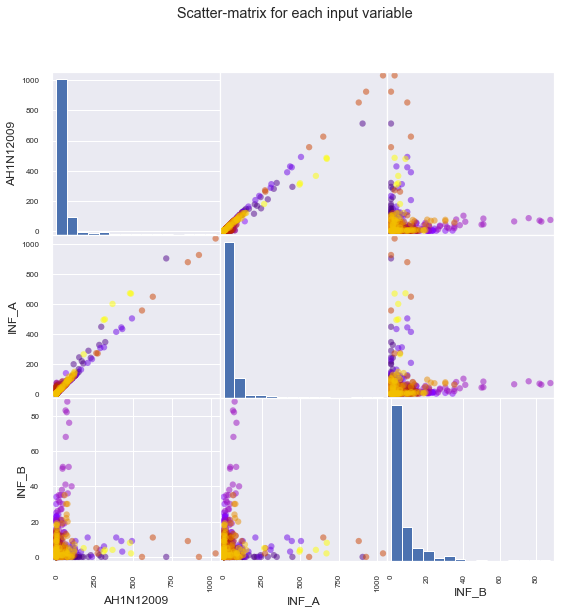

In [815]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
flu_types = ['AH1N12009', 'INF_A', 'INF_B']
X = fludata1[flu_types]
y = fludata1['Year']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('flu_scatter_matrix')

Text(0, 0.5, 'Total Flu Cases')

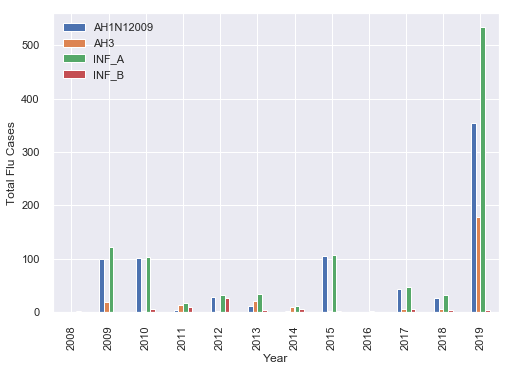

In [816]:
fludata2 = fludata[['Year','AH1N12009','AH3','INF_A', 'INF_B']].groupby('Year', as_index=True).mean()

ax = fludata2.plot(kind = 'bar')
ax.set_ylabel("Total Flu Cases")


Text(0, 0.5, 'Total Flu Cases')

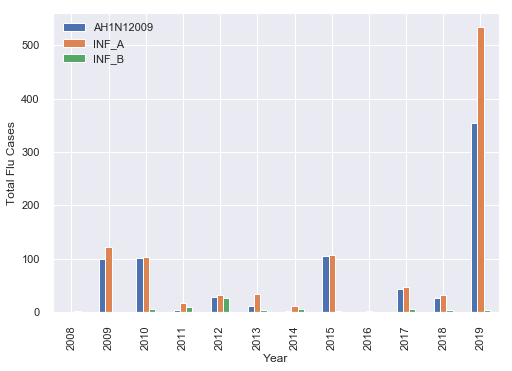

In [817]:
fludata2 = fludata[['Year','AH1N12009','INF_A', 'INF_B']].groupby('Year', as_index=True).mean()

ax = fludata2.plot(kind = 'bar')
ax.set_ylabel("Total Flu Cases")

In [818]:
print(fludata1.shape)


(555, 16)


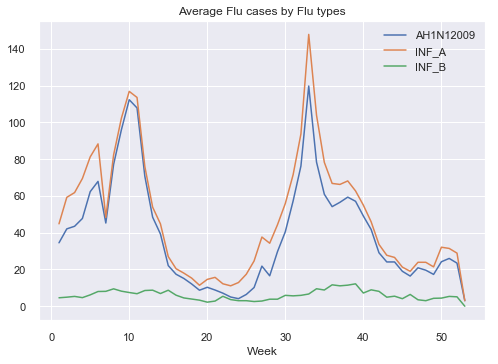

In [819]:
fludata2 = fludata[['Week','AH1N12009','INF_A', 'INF_B']].groupby('Week', as_index=True).mean()
fludata2.plot(title = "Average Flu cases by Flu types")

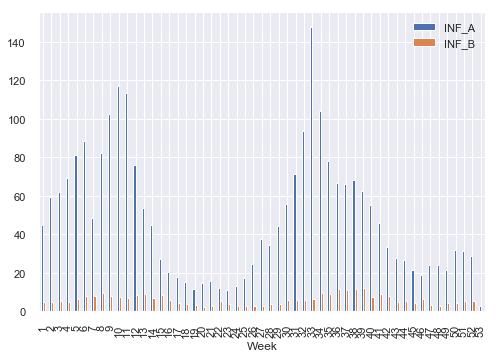

In [820]:
fludata6 = fludata[['Week','INF_A', 'INF_B']].groupby('Week', as_index=True).mean()
fludata6.plot(kind = 'bar')

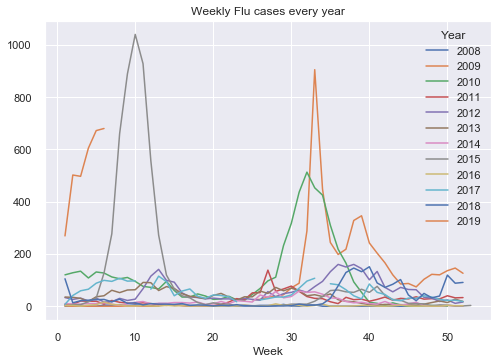

In [821]:
flutemp = fludata1[['Year','Week','ALL_INF']]
#flutemp = flutemp.set_index.T.rename_axis('').rename_axis(None, 1)
flutemp = flutemp.pivot(index='Week',
                       columns='Year',
                       values='ALL_INF')
flutemp.plot(title = 'Weekly Flu cases every year')

#  5) Train and test models

* Train and test models to see the difference.
* As it is numeric data, liner regression is useful, still compare with other stats.

In [822]:
X = fludata1[['INF_A', 'INF_B','ALL_INF']]
y = fludata1['Week']

In [823]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\BG\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [824]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.05


In [825]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.19
Accuracy of K-NN classifier on test set: 0.02


In [826]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.04
Accuracy of Logistic regression classifier on test set: 0.00


C:\Users\BG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [827]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.04
Accuracy of GNB classifier on test set: 0.01


In [828]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.03
Accuracy of SVM classifier on test set: 0.00


C:\Users\BG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [829]:
X = fludata1[['ALL_INF']]
y = fludata1['Week']

In [830]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [831]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [832]:
predictions = lm.predict(X_test)

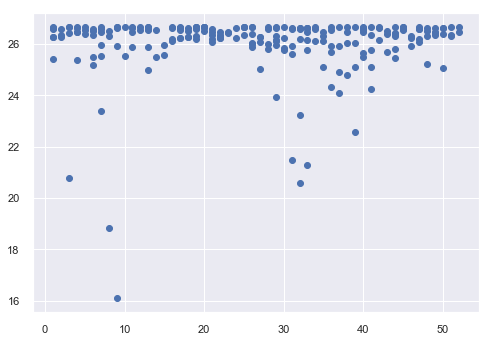

In [833]:
plt.scatter(y_test,predictions)

In [834]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.39
Accuracy of Decision Tree classifier on test set: 0.01


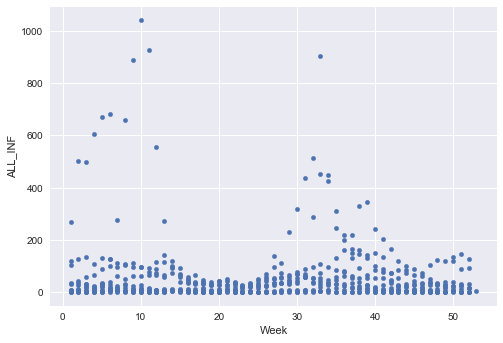

In [835]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

fludata1.plot(x='Week', y='ALL_INF', kind='scatter')
plt.show()

 

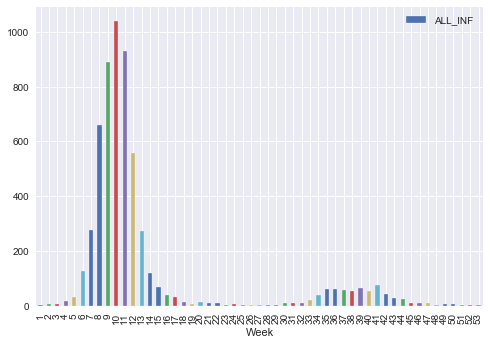

In [836]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
fludata5 = fludata1.query('Year == 2015') 

fludata5.plot(x='Week', y='ALL_INF', kind='bar')
plt.show()

In [837]:
import statsmodels.api as sm
fludata1['const'] = 1

reg1 = sm.OLS(endog=fludata1['ALL_INF'], exog=fludata1[['const', 'Week']], missing='drop')
type(reg1)

results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

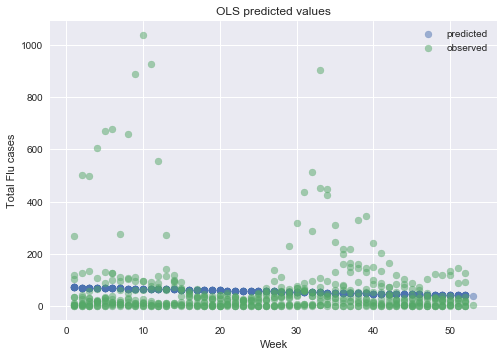

In [838]:
df1_plot = fludata1.dropna(subset=['Week', 'ALL_INF'])

# Plot predicted values

plt.scatter(df1_plot['Week'], results.predict(), alpha=0.5, label='predicted')

# Plot observed values

plt.scatter(df1_plot['Week'], df1_plot['ALL_INF'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Week')
plt.ylabel('Total Flu cases')
plt.show()

In [839]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ALL_INF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.315
Date:                Thu, 28 Feb 2019   Prob (F-statistic):             0.0692
Time:                        19:16:57   Log-Likelihood:                -3433.4
No. Observations:                 555   AIC:                             6871.
Df Residuals:                     553   BIC:                             6879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.1995      9.979      7.235      0.0

In [840]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [841]:
sns.set(color_codes=True)

C:\Users\BG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


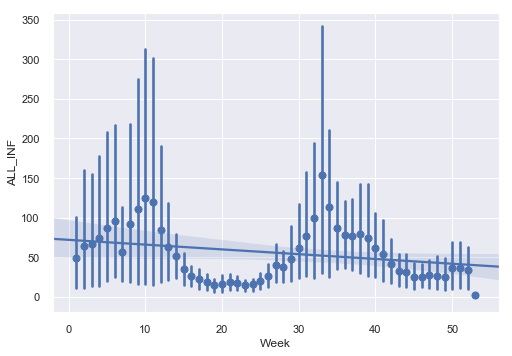

In [842]:
sns.regplot(x="Week", y="ALL_INF", data=fludata, x_estimator=np.mean);

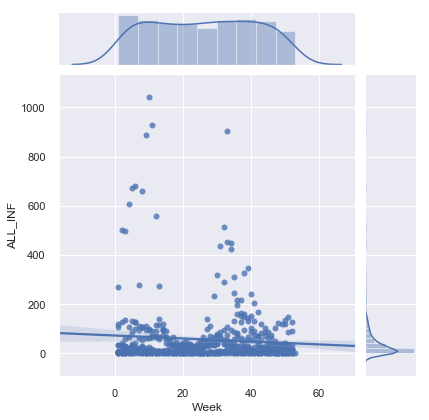

In [843]:
sns.jointplot(x="Week", y="ALL_INF", data=fludata, kind="reg");

#  6) Conclusion


  Per my analysis, it is visible that flu ourbreak is generally at peak in around after week 10 and again in week 33. However, outlier in week 1 and 2 of the year 2015 are not real outliers. I did verify the data with general news and health reports from the region. It was worst outbreak of the history, like a sprint - short lived.
  
  Most of the cases are of type A viruses, H1N12009 virus is major player in type A cases followed by AH3.